# Superstore Data Analysis


**In this project of Data Analysis we are required to analyse the given data and understand the various factors contributing to Sales and Profits; also defining where and how this store is lagging behind in providing optimum Sales and Profits.**

The given Dataset consists of the following :
a) 9994 Transaction Entries
b) 13 columns

These columns consists of the following:
* Ship Mode
* Segment
* Country
* City
* State
* Postal Code
* Region
* Category
* Sub-Category
* Sales
* Quantity
* Discount
* Profit

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#storing the data into 'retail' Dataframe
retail=pd.read_csv(r"C:\Users\VISHNU\Downloads\SampleSuperstore (1).csv")

In [3]:
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#checking the number of unique entries in each column
retail.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [6]:
retail['Country'].unique()

array(['United States'], dtype=object)

In [7]:
retail['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [8]:
retail['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
retail['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [10]:
retail['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [11]:
retail['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [12]:
retail['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [13]:
gbsegment_sum=retail.groupby('Segment').sum()     #GroupBy Segment and Sum
gbsegment_mean=retail.groupby('Segment').mean()   #GroupBy Segment and Mean

## Below Graphs shows Total Number of Profit and Sales made 'By Segment'

<AxesSubplot:title={'center':'Total Sales'}, xlabel='Segment', ylabel='Sales'>

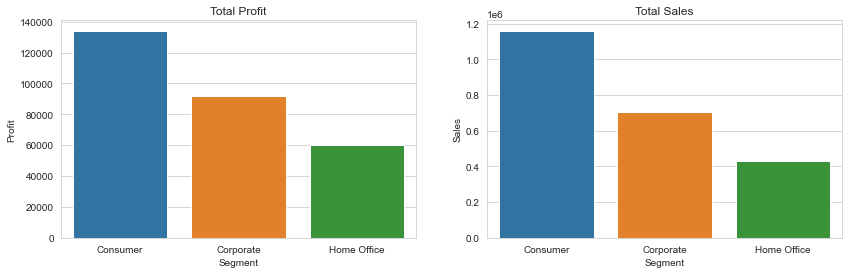

In [14]:

plt.figure(figsize=(14,4))
sns.set_style('whitegrid')

plt.subplot(1,2,1)
plt.title('Total Profit')
sns.barplot(x = gbsegment_sum.index, y = 'Profit', data=gbsegment_sum, ci=None)

plt.subplot(1,2,2)
plt.title('Total Sales')
sns.barplot(x = gbsegment_sum.index, y = 'Sales', data=gbsegment_sum, ci=None)

<AxesSubplot:title={'center':'Sales Per Transaction'}, xlabel='Segment', ylabel='Sales'>

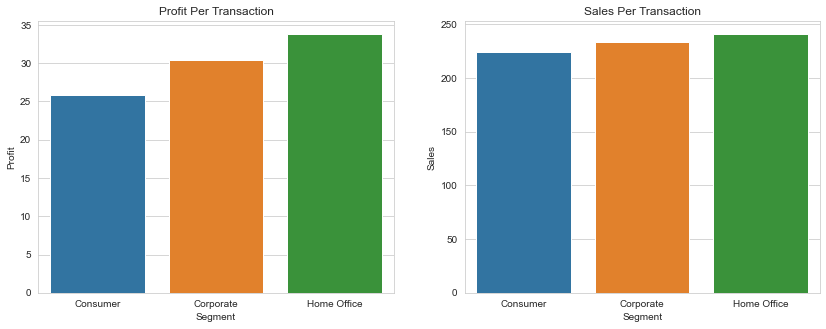

In [15]:
plt.figure(figsize=(14,5))
sns.set_style('whitegrid')

plt.subplot(1,2,1)
plt.title('Profit Per Transaction')
sns.barplot(x = gbsegment_mean.index, y = 'Profit', data=gbsegment_mean, ci=None)

plt.subplot(1,2,2)
plt.title('Sales Per Transaction')
sns.barplot(x = gbsegment_mean.index, y = 'Sales', data=gbsegment_mean, ci=None)

In [16]:
gbstate_sum = retail.groupby('State').sum()          #GroupBy State and Sum
gbstate_mean = retail.groupby('State').mean()        #GroupBy State and Mean

In [17]:
gbstate_mean.head()


,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,
Alabama,35994.573770,319.846557,4.196721,0.000000,94.865989
Arizona,85277.348214,157.508933,3.848214,0.303571,-15.303235
Arkansas,72321.816667,194.635500,4.000000,0.000000,66.811452
California,92145.246877,228.729451,3.831584,0.072764,38.171608
Colorado,80295.758242,176.418231,3.807692,0.316484,-35.867351


In [18]:

gbstate_sum.head()

,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,
Alabama,2195669,19510.6400,256,0.0,5786.8253
Arizona,19102126,35282.0010,862,68.0,-3427.9246
Arkansas,4339309,11678.1300,240,0.0,4008.6871
California,184382639,457687.6315,7667,145.6,76381.3871
Colorado,14613828,32108.1180,693,57.6,-6527.8579


<AxesSubplot:title={'center':'Total Profit'}, xlabel='Profit', ylabel='State'>

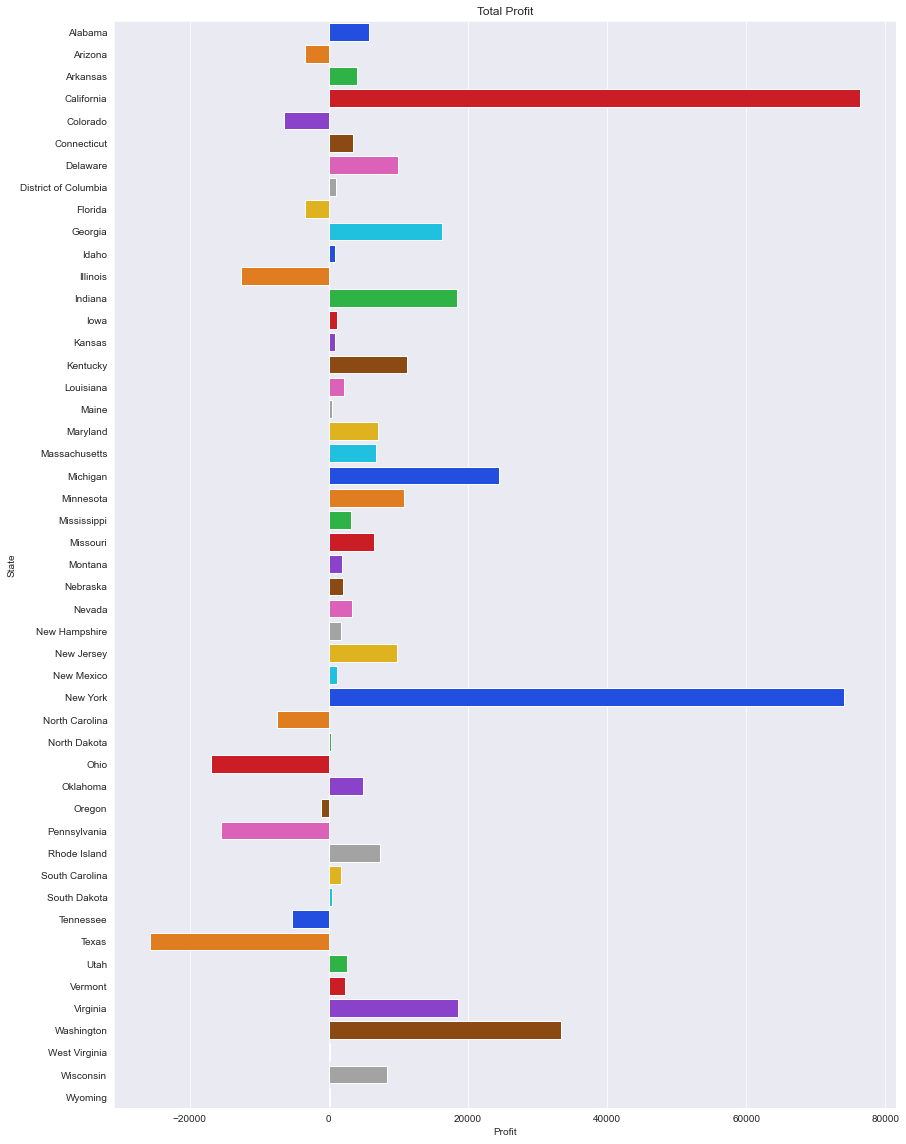

In [19]:
plt.figure(figsize=(14,20))
sns.set_style('darkgrid')
plt.title('Total Profit')
sns.barplot(x="Profit", y=gbstate_sum.index, data=gbstate_sum, color='b', ci=None, palette='bright')

<AxesSubplot:title={'center':'Profit Per Transaction'}, xlabel='Profit', ylabel='State'>

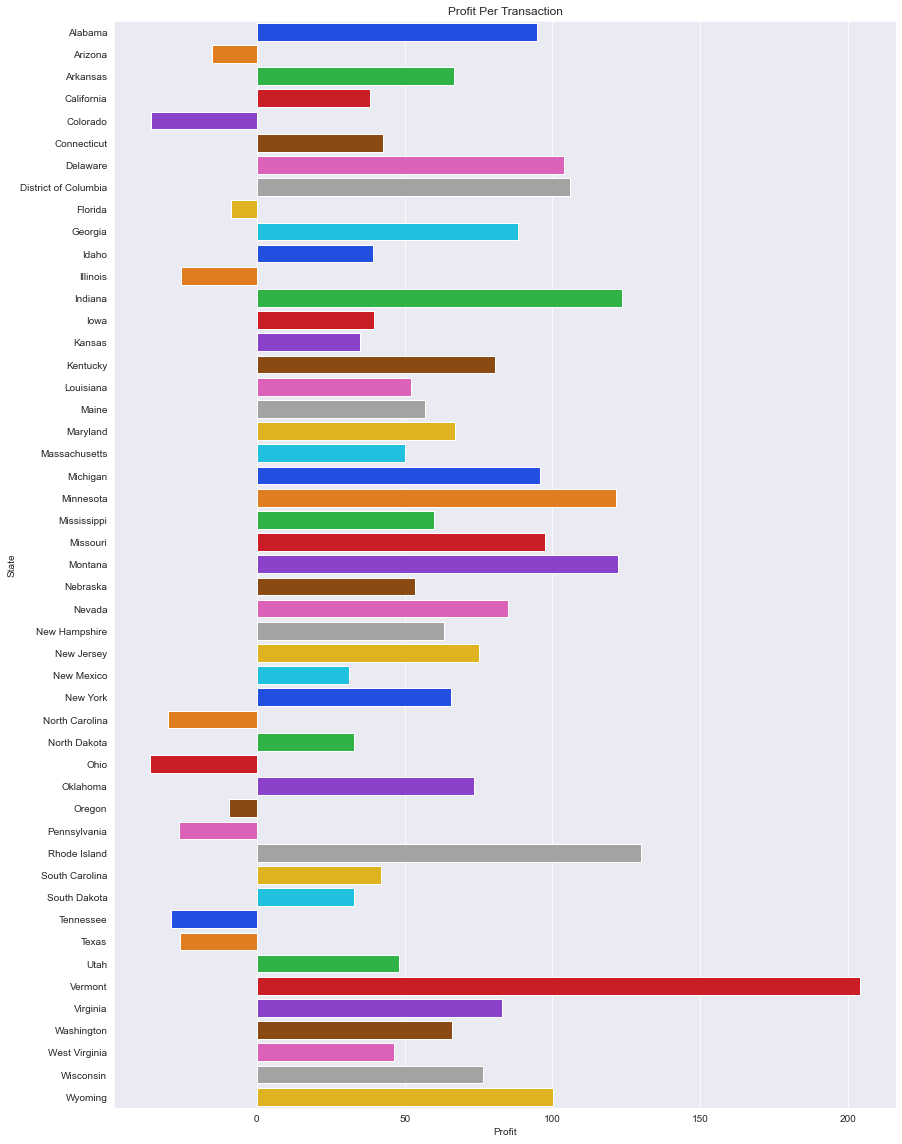

In [20]:
plt.figure(figsize=(14,20))
sns.set_style('darkgrid')
plt.title('Profit Per Transaction')
sns.barplot(x="Profit", y=gbstate_mean.index, data=gbstate_mean, color='b', ci=None, palette='bright')


From above graph we can understand that supermarkets in the 10 states are in loss; where as New York and California are showing huge amount of "Total Profits" where as some states are showing profits in average range while a lot of states are making a very little profits. But when we see the profits per transaction New York and California boils down to the average ranges with others while the state like Vermont it is making higher profits per transaction.

From this we can deduce that this type of behaviour in New York and California is caused due to making higher number of sales, where in Vermont the number of sales are made less but the profit made in each transaction is higher.

In [21]:
gbcategory_sum = retail.groupby('Category').sum()       #GroupBy Category and Sum
gbcategory_mean = retail.groupby('Category').mean()     #GroupBy category and Mean

# Below Graphs shows Total Number of Profit and Sales made 'By Category'

<AxesSubplot:title={'center':'Total Sales'}, xlabel='Category', ylabel='Sales'>

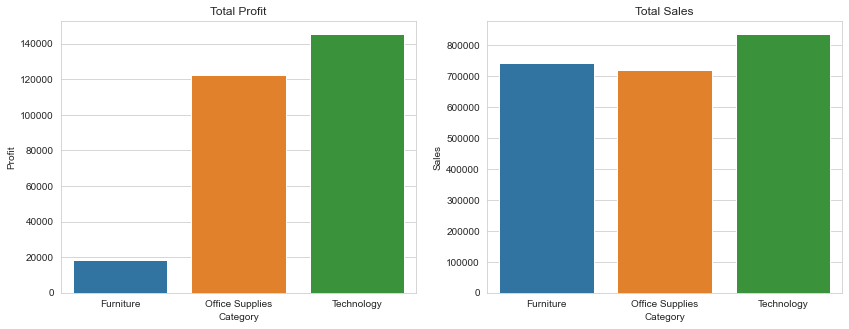

In [22]:
plt.figure(figsize=(14,5))
sns.set_style('whitegrid')

plt.subplot(1,2,1)
plt.title('Total Profit')
sns.barplot(x = gbcategory_sum.index, y = 'Profit', data=gbcategory_sum, ci=None)

plt.subplot(1,2,2)
plt.title('Total Sales')
sns.barplot(x = gbcategory_sum.index, y = 'Sales', data=gbcategory_sum, ci=None)

# Below Graphs shows Profit and Sales made per transaction 'By Category

<AxesSubplot:title={'center':'Sales Per Transaction'}, xlabel='Category', ylabel='Sales'>

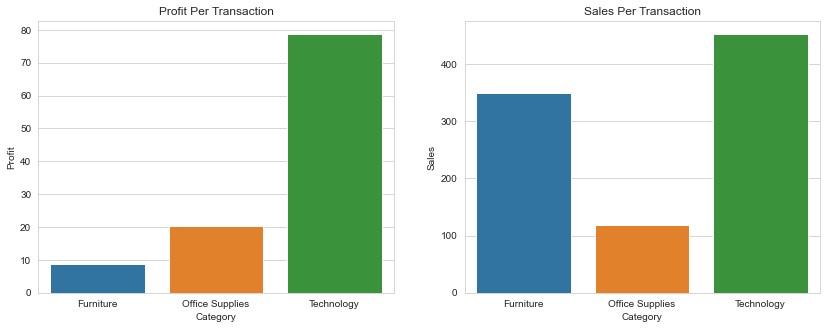

In [23]:
plt.figure(figsize=(14,5))
sns.set_style('whitegrid')

plt.subplot(1,2,1)
plt.title('Profit Per Transaction')
sns.barplot(x = gbcategory_mean.index, y = 'Profit', data=gbcategory_mean, ci=None)

plt.subplot(1,2,2)
plt.title('Sales Per Transaction')
sns.barplot(x = gbcategory_mean.index, y = 'Sales', data=gbcategory_mean, ci=None)

# Geographical Plotting

In [24]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [25]:
gbstate_sum['Abbrev'] = gbstate_sum.index.map(us_state_abbrev)   #Adding State Abbreviation Column to 'gbstate_sum' DataFrame

In [26]:
gbstate_mean['Abbrev'] = gbstate_mean.index.map(us_state_abbrev) #Adding State Abbreviation Column to 'gbstate_mean' DataFrame

In [27]:
!pip3 install plotly

In [28]:
!pip3 install chart_studio

In [29]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [30]:
data = dict(type='choropleth',
            colorscale = 'Portland',
            locations = gbstate_sum['Abbrev'],
            z = gbstate_sum['Profit'],
            locationmode = 'USA-states',
            text = gbstate_sum.index,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"USD"}
            )

In [31]:
layout = dict(title = 'Total Profits',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)'))

In [32]:
choromap = go.Figure(data = [data],layout = layout)

In [33]:
iplot(choromap)

In [34]:
data1 = dict(type='choropleth',
            colorscale = 'Portland',
            locations = gbstate_mean['Abbrev'],
            z = gbstate_mean['Profit'],
            locationmode = 'USA-states',
            text = gbstate_mean.index,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"USD"}
            ) 

layout1 = dict(title = 'Mean Profits',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)'))

In [35]:

choromap1 = go.Figure(data = [data1],layout = layout1)

In [36]:

iplot(choromap1)


From the above analysis we can conclude that the 10 states of USA which are Arizona, Colorado, Florida, Illinois, North Carolina, Ohio, Oregon, Pennsylvania, Tennessee, and Texas are performing poorly in terms of Profits. Let's check in which segment and sectors they are lagging behind other states.

In [37]:
#pps stands for "Poor Performing States"
#stroing data of states which are making loss in dataframe called 'pps'

pps = retail.loc[retail['State'].isin(['Arizona', 'Colorado', 'Florida', 'Illinois', 'North Carolina', 
                                       'Ohio', 'Oregon', 'Pennsylvania', 'Tennessee', 'Texas'])]
pps.drop(labels=['Country', 'Postal Code'], axis=1, inplace=True)

C:\Users\VISHNU\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:

pps['State'].unique()

array(['Florida', 'North Carolina', 'Texas', 'Pennsylvania', 'Illinois',
       'Arizona', 'Tennessee', 'Oregon', 'Colorado', 'Ohio'], dtype=object)

In [39]:
pps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3878 entries, 3 to 9989
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     3878 non-null   object 
 1   Segment       3878 non-null   object 
 2   City          3878 non-null   object 
 3   State         3878 non-null   object 
 4   Region        3878 non-null   object 
 5   Category      3878 non-null   object 
 6   Sub-Category  3878 non-null   object 
 7   Sales         3878 non-null   float64
 8   Quantity      3878 non-null   int64  
 9   Discount      3878 non-null   float64
 10  Profit        3878 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 363.6+ KB


In [40]:
pps.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
12,Standard Class,Consumer,Concord,North Carolina,South,Office Supplies,Paper,15.5520,3,0.20,5.4432
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160


In [41]:
pps_gbsegment_sum = pps.groupby('Segment').sum()       #GroupBy Segment and Sum
pps_gbsegment_mean = pps.groupby('Segment').mean()     #GroupBy Segment and Mean

<AxesSubplot:title={'center':'Total Sales'}, xlabel='Segment', ylabel='Sales'>

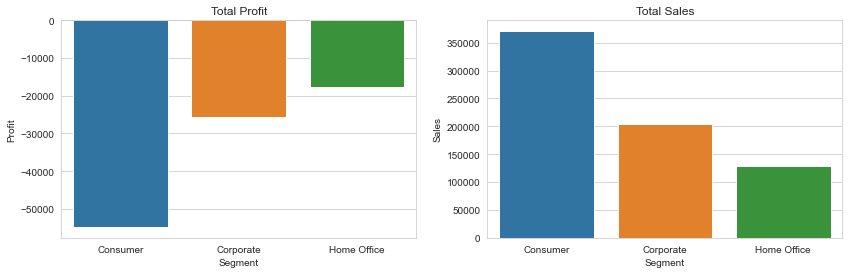

In [42]:
plt.figure(figsize=(14,4))
sns.set_style('whitegrid')

plt.subplot(1,2,1)
plt.title('Total Profit')
sns.barplot(x = pps_gbsegment_sum.index, y = 'Profit', data=pps_gbsegment_sum, ci=None)

plt.subplot(1,2,2)
plt.title('Total Sales')
sns.barplot(x = pps_gbsegment_sum.index, y = 'Sales', data=pps_gbsegment_sum, ci=None)


From above graph we can observe that the Profit and Sales in the poor performing states are Inversely Proportional to each other.

<AxesSubplot:title={'center':'Sales Per Transaction'}, xlabel='Segment', ylabel='Sales'>

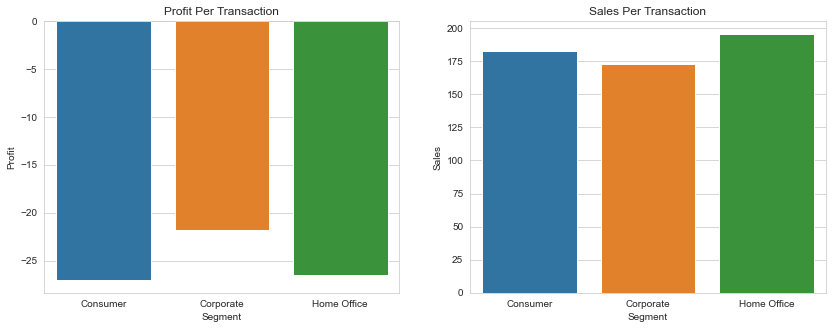

In [43]:
plt.figure(figsize=(14,5))
sns.set_style('whitegrid')

plt.subplot(1,2,1)
plt.title('Profit Per Transaction')
sns.barplot(x = pps_gbsegment_mean.index, y = 'Profit', data=pps_gbsegment_mean, ci=None)

plt.subplot(1,2,2)
plt.title('Sales Per Transaction')
sns.barplot(x = pps_gbsegment_mean.index, y = 'Sales', data=pps_gbsegment_mean, ci=None)

In [44]:
pps_gbcategory_sum = pps.groupby('Category').sum()       #GroupBy Category and Sum
pps_gbcategory_mean = pps.groupby('Category').mean()     #GroupBy category and Mean

<AxesSubplot:title={'center':'Total Sales'}, xlabel='Category', ylabel='Sales'>

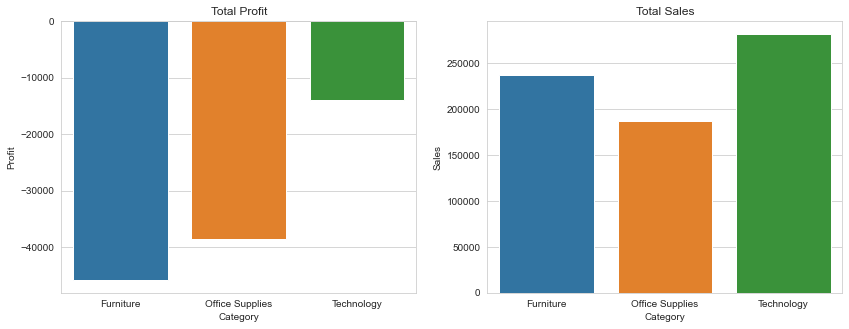

In [45]:
plt.figure(figsize=(14,5))
sns.set_style('whitegrid')

plt.subplot(1,2,1)
plt.title('Total Profit')
sns.barplot(x = pps_gbcategory_sum.index, y = 'Profit', data=pps_gbcategory_sum, ci=None)

plt.subplot(1,2,2)
plt.title('Total Sales')
sns.barplot(x = pps_gbcategory_sum.index, y = 'Sales', data=pps_gbcategory_sum, ci=None)

<AxesSubplot:title={'center':'Sales Per Transaction'}, xlabel='Category', ylabel='Sales'>

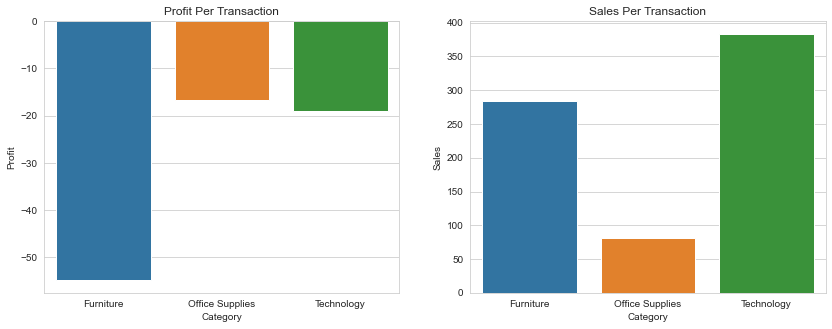

In [46]:
plt.figure(figsize=(14,5))
sns.set_style('whitegrid')

plt.subplot(1,2,1)
plt.title('Profit Per Transaction')
sns.barplot(x = pps_gbcategory_mean.index, y = 'Profit', data=pps_gbcategory_mean, ci=None)

plt.subplot(1,2,2)
plt.title('Sales Per Transaction')
sns.barplot(x = pps_gbcategory_mean.index, y = 'Sales', data=pps_gbcategory_mean, ci=None)


From the Analysis we can conclude that the "Supterstore" needs to work on 10 States where its performing very poorly, but needs to absolutely work its 'Furniture' category and 'Consumer' segment in these 10 states first as it is the major factor causing the loss if not the only one